In [34]:
## Installation des librairies

In [35]:
!pip install yfinance
!pip install requests
!pip install beautifulsoup4

In [36]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Question 1 - Extraction des données sur les actions de Tesla à l'aide de yfinance 

In [37]:
tesla_data = yf.download('TSLA')
tesla_data.reset_index(inplace=True)
print(tesla_data.head())

[*********************100%***********************]  1 of 1 completed

        Date      Open      High       Low     Close  Adj Close     Volume
0 2010-06-29  1.266667  1.666667  1.169333  1.592667   1.592667  281494500
1 2010-06-30  1.719333  2.028000  1.553333  1.588667   1.588667  257806500
2 2010-07-01  1.666667  1.728000  1.351333  1.464000   1.464000  123282000
3 2010-07-02  1.533333  1.540000  1.247333  1.280000   1.280000   77097000
4 2010-07-06  1.333333  1.333333  1.055333  1.074000   1.074000  103003500


## Question 2 - Extraction des données sur les revenus de Tesla à l'aide de Webscraping

In [39]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data = requests.get(url).text
soup = BeautifulSoup(html_data, "html.parser")
tables = pd.read_html(str(soup))
tesla_revenue = tables[1]  # Assuming the Tesla revenue table is the second table on the page
tesla_revenue.columns = ["Date", "Revenue"]
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"", regex=True)
tesla_revenue.dropna(inplace=True)

print(tesla_revenue.tail())

          Date Revenue
48  2010-09-30      31
49  2010-06-30      28
50  2010-03-31      21
52  2009-09-30      46
53  2009-06-30      27


## Question 3 - Extraction des données boursières de GameStop à l'aide de yfinance

In [41]:
gme_data = yf.download('GME')
gme_data.reset_index(inplace=True)
print(gme_data.head())

[*********************100%***********************]  1 of 1 completed

        Date     Open     High      Low    Close  Adj Close    Volume
0 2002-02-13  2.40625  2.51500  2.38125  2.51250   1.691667  76216000
1 2002-02-14  2.54375  2.54875  2.48125  2.50000   1.683250  11021600
2 2002-02-15  2.50000  2.50625  2.46250  2.48750   1.674834   8389600
3 2002-02-19  2.47500  2.47500  2.34375  2.38750   1.607504   7410400
4 2002-02-20  2.40000  2.46875  2.38125  2.46875   1.662210   6892800


## Question 4 - Extraction des données de revenus de GameStop à l'aide de Webscraping

In [43]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data_2 = requests.get(url).text
soup_2 = BeautifulSoup(html_data_2, "html.parser")
tables_2 = pd.read_html(str(soup_2))
gme_revenue = tables_2[1]  # Assuming the GameStop revenue table is the second table on the page
gme_revenue.columns = ["Date", "Revenue"]
gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',|\$', "", regex=True)
gme_revenue.dropna(inplace=True)
gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]
print(gme_revenue.tail())

          Date Revenue
57  2006-01-31    1667
58  2005-10-31     534
59  2005-07-31     416
60  2005-04-30     475
61  2005-01-31     709


In [44]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()


## Question 5 - Tableau de bord des actions et des revenus de Tesla

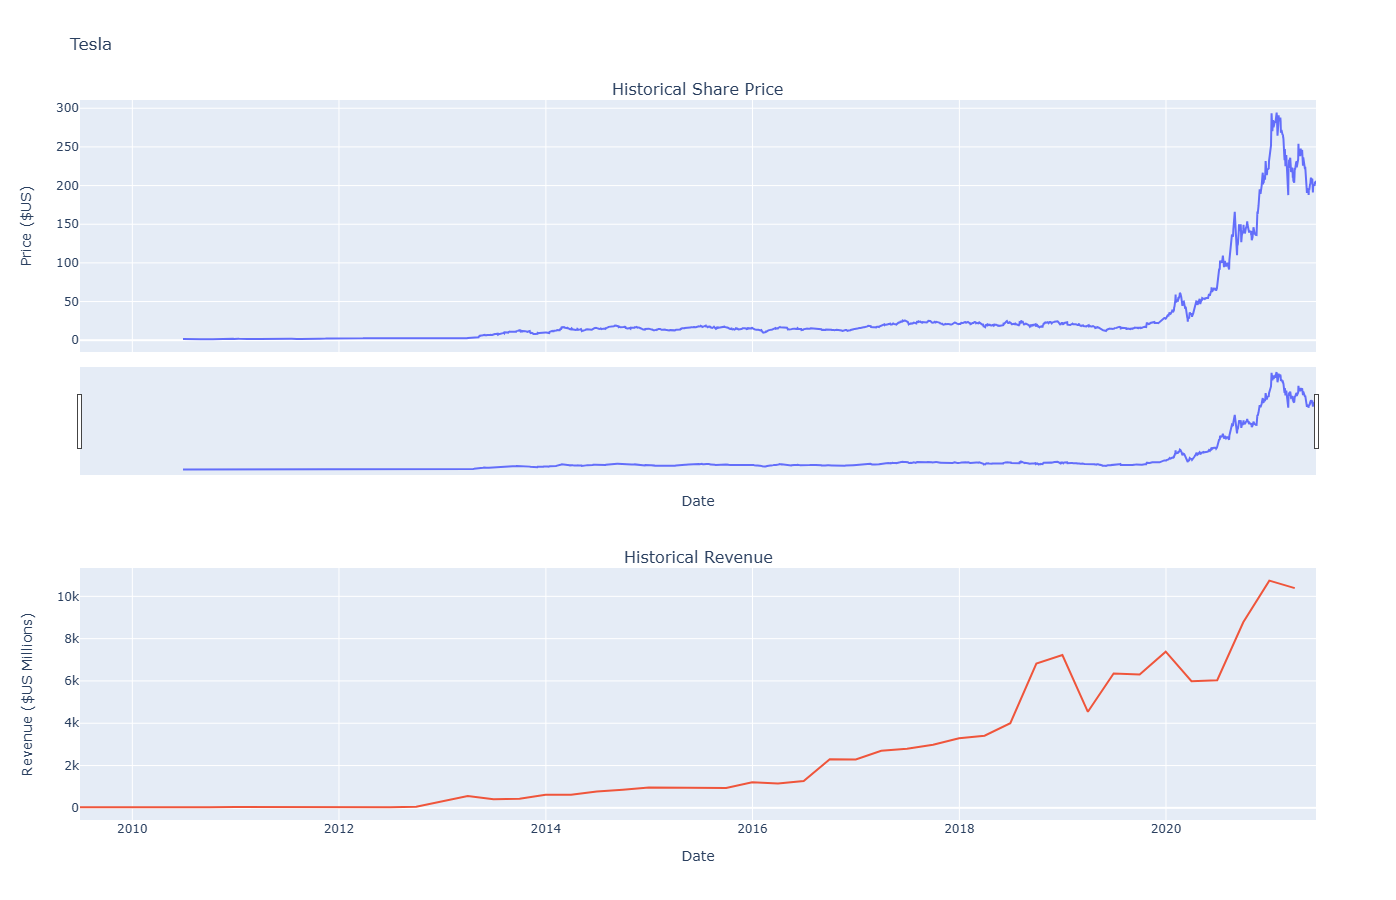

In [47]:
make_graph(tesla_data, tesla_revenue, 'Tesla')

## Question 6 - Tableau de bord des actions et des revenus de GameStop

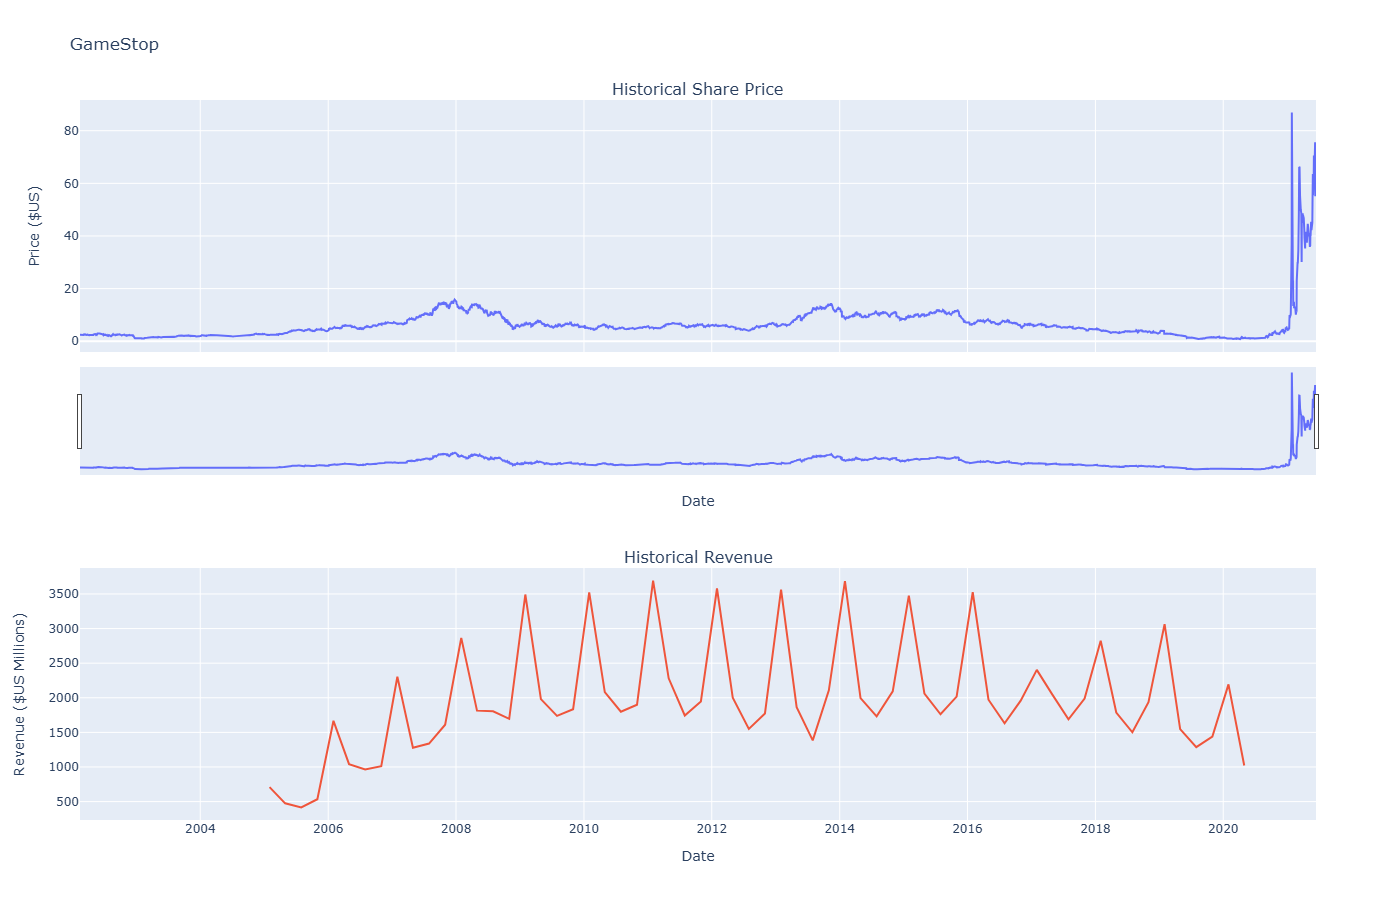

In [48]:
make_graph(gme_data, gme_revenue, 'GameStop')

## Question 7 - Partage de votre cahier d'exercices - 2 points